# Part I: Modeling the Spread of Nicotine Use due to Vaping over the Next 10 Years
* Build a mathematical model that predicts the spread of nicotine use due to vaping over the next 10 years. 
  * We can quantify the the __spread__ of nicotine use due to vaping with the percentage of high school students who used e-cigarettes in the past 30 days.									
  * We're only modeling for teens.

* Then, analyze how the growth of this new form of nicotine use compares to that of cigarettes.
  * Need data for % v. time for both vaping and cigarretes
  * Can analyze the difference using the mean difference


In [0]:
from google.colab import files
files.upload()

Saving high_school_vaping_cigarettes_data.csv to high_school_vaping_cigarettes_data.csv


{'high_school_vaping_cigarettes_data.csv': b'Year,Vaping_Overall_Percentage,Cigarettes_Overall_Percentage\r\n2011,1.5,11.7\r\n2012,2.8,10.6\r\n2013,4.5,9.6\r\n2014,13.4,8\r\n2015,16,9.3\r\n2016,11.3,8\r\n2017,11.7,7.6\r\n2018,20.8,8.1'}

In [0]:
! pip install statsmodels

## Vaping 

In [0]:
import pandas as pd
df = pd.read_csv('high_school_vaping_cigarettes_data.csv')
# df['Year'] = (df['Year'] - df['Year'].min()).reshape(-1, 1)
df['Vaping_Overall_Percentage'] = df['Vaping_Overall_Percentage'] / 100
df

,Year,Vaping_Overall_Percentage,Cigarettes_Overall_Percentage
0,2011,0.015,11.7
1,2012,0.028,10.6
2,2013,0.045,9.6
3,2014,0.134,8.0
4,2015,0.160,9.3
5,2016,0.113,8.0
6,2017,0.117,7.6
7,2018,0.208,8.1


In [0]:
import statsmodels.formula.api as smf

smresults = smf.ols("Vaping_Overall_Percentage ~ Year", df).fit()

df['pred'] = smresults.predict() 
print(smresults.summary(), smresults.params)

                                OLS Regression Results                               
Dep. Variable:     Vaping_Overall_Percentage   R-squared:                       0.757
Model:                                   OLS   Adj. R-squared:                  0.717
Method:                        Least Squares   F-statistic:                     18.72
Date:                       Sat, 02 Mar 2019   Prob (F-statistic):            0.00494
Time:                               00:00:55   Log-Likelihood:                 16.366
No. Observations:                          8   AIC:                            -28.73
Df Residuals:                              6   BIC:                            -28.57
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


### Regression Assumptions
 * Meets all assumptions: Linearity, Homoscedasticity, Normality

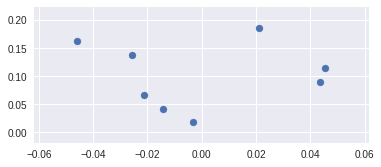

In [0]:
pred_val = smresults.fittedvalues.copy()
true_val = df['Vaping_Overall_Percentage'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize = (6, 2.5))
_ = ax.scatter(residual, pred_val)

In [0]:
# testing linearity
import statsmodels.stats.api as sms
# if significant, then not linear; if not significant, then linear
sms.linear_harvey_collier(smresults)


Ttest_1sampResult(statistic=-0.27946741729140073, pvalue=0.7937414140360102)

In [0]:
import statsmodels
# testing equal variance and homoscedasticity
double = pd.DataFrame(pd.np.tile(df['Vaping_Overall_Percentage'], (2, 1))).T
# if significant, then heteroscedasticity; if not significant, then equal variance
fstat, pval,_ = statsmodels.stats.diagnostic.het_goldfeldquandt(residual, double)
print("F-Statistic: ", fstat, "P-Value: ", pval)

F-Statistic:  3.1628245673540896 P-Value:  0.18479030444671207


R-Squared: 0.9457554576773988


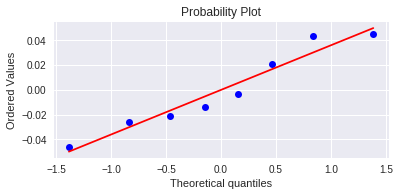

In [0]:
# testing normality, if r-squared is high, then normality is met
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot = ax, fit = True)
print("R-Squared:", r**2)

### Plotting with Sklearn and Matplotlib

In [0]:
# sklearn
from sklearn import linear_model
x = df['Year'].values.reshape(-1, 1) 
# x = (df['Year'] - df['Year'].min()).reshape(-1, 1) # for transforming years to time from 2011
y = df['Vaping_Overall_Percentage'] 
reg = linear_model.LinearRegression()
reg.fit(x, y)

reg.coef_, reg.intercept_


(array([0.02411905]), -48.48532142857144)

In [0]:
import numpy as np
experimental = np.arange(2019, 2029).reshape(-1, 1)
# experimental = np.arange(8, 18).reshape(-1, 1)
print(experimental.size)
predicted = reg.predict(experimental)

10


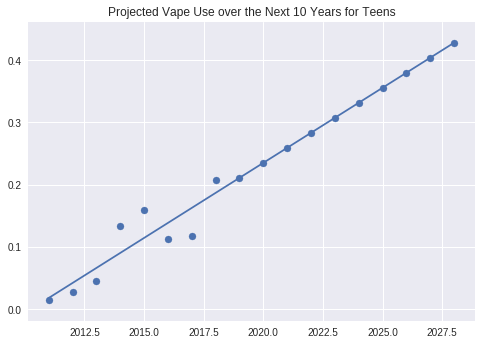

In [0]:
import matplotlib.pyplot as plt
total_x = np.concatenate([x, experimental], axis = 0)
total_y = np.concatenate([y, predicted], axis = 0)
m = reg.coef_
b = reg.intercept_
plt.scatter(total_x, total_y)
plt.plot(total_x, m * total_x + b, '-')
plt.title("Projected Vape Use over the Next 10 Years for Teens")
plt.show()

## Cigarettes

In [0]:
import pandas as pd
df = pd.read_csv('high_school_vaping_cigarettes_data.csv')
# df['Year'] = (df['Year'] - df['Year'].min()).reshape(-1, 1)
df['Cigarettes_Overall_Percentage'] = df['Cigarettes_Overall_Percentage'] / 100
df

,Year,Vaping_Overall_Percentage,Cigarettes_Overall_Percentage
0,2011,1.5,0.117
1,2012,2.8,0.106
2,2013,4.5,0.096
3,2014,13.4,0.080
4,2015,16.0,0.093
5,2016,11.3,0.080
6,2017,11.7,0.076
7,2018,20.8,0.081


In [0]:
import statsmodels.formula.api as smf

smresults = smf.ols("Cigarettes_Overall_Percentage ~ Year", df).fit()

df['pred'] = smresults.predict() 
print(smresults.summary(), smresults.params)

                                  OLS Regression Results                                 
Dep. Variable:     Cigarettes_Overall_Percentage   R-squared:                       0.759
Model:                                       OLS   Adj. R-squared:                  0.719
Method:                            Least Squares   F-statistic:                     18.94
Date:                           Sat, 02 Mar 2019   Prob (F-statistic):            0.00481
Time:                                   00:02:07   Log-Likelihood:                 28.682
No. Observations:                              8   AIC:                            -53.36
Df Residuals:                                  6   BIC:                            -53.21
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


### Regression Assumptions
 * Meets all assumptions: Linearity, Homoscedasticity, Normality

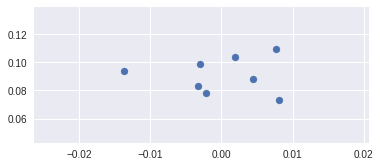

In [0]:
pred_val = smresults.fittedvalues.copy()
true_val = df['Cigarettes_Overall_Percentage'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize = (6, 2.5))
_ = ax.scatter(residual, pred_val)

In [0]:
# testing linearity
import statsmodels.stats.api as sms
# if significant, then not linear; if not significant, then linear
sms.linear_harvey_collier(smresults)

Ttest_1sampResult(statistic=1.8210202579282302, pvalue=0.14270785939527525)

In [0]:
import statsmodels
# testing equal variance and homoscedasticity
double = pd.DataFrame(pd.np.tile(df['Vaping_Overall_Percentage'], (2, 1))).T
# if significant, then not heteroscedasticity; if not significant, then equal variance
fstat, pval,_ = statsmodels.stats.diagnostic.het_goldfeldquandt(residual, double)
print("F-Statistic: ", fstat, "P-Value: ", pval)

F-Statistic:  0.651058507713326 P-Value:  0.6335374080096343


R-Squared:  0.9169933619851348


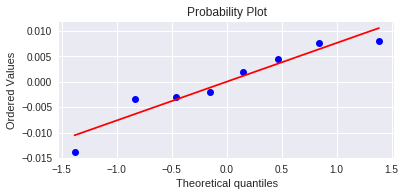

In [0]:
# testing normality; if r-squared is high, then normality is met.
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
print("R-Squared: ", r**2)

### Plotting

Coef:  [-0.00520238] 
Intercept:  10.57132142857143
10


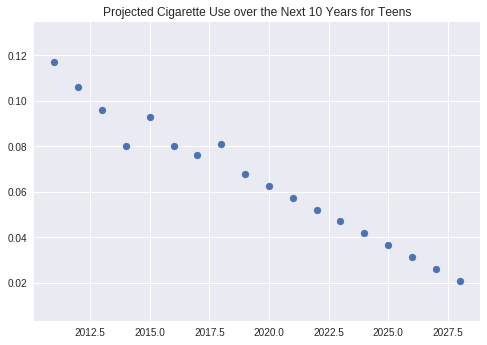

In [0]:
# sklearn
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

x = df['Year'].values.reshape(-1, 1) 
y = df['Cigarettes_Overall_Percentage'] 
reg = linear_model.LinearRegression()
reg.fit(x, y)

print("Coef: ", reg.coef_, "\nIntercept: ",reg.intercept_)

experimental = np.arange(2019, 2029).reshape(-1, 1)
# experimental = np.arange(8, 18).reshape(-1, 1)
print(experimental.size)
predicted = reg.predict(experimental)
total_x = np.concatenate([x, experimental], axis = 0)
total_y = np.concatenate([y, predicted], axis = 0)

plt.scatter(total_x, total_y)
plt.title("Projected Cigarette Use over the Next 10 Years for Teens")
plt.show()

## Comparing Cigarette and Vaping Use

In [0]:
import pandas as pd
df = pd.read_csv('high_school_vaping_cigarettes_data.csv')
# converting percentages to decimals
df['Vaping_Overall_Percentage'] = df['Vaping_Overall_Percentage'] / 100
df['Cigarettes_Overall_Percentage'] = df['Cigarettes_Overall_Percentage'] / 100
df

,Year,Vaping_Overall_Percentage,Cigarettes_Overall_Percentage
0,2011,0.015,0.117
1,2012,0.028,0.106
2,2013,0.045,0.096
3,2014,0.134,0.080
4,2015,0.160,0.093
5,2016,0.113,0.080
6,2017,0.117,0.076
7,2018,0.208,0.081


In [0]:
import statsmodels.formula.api as smf
# OLS linear regression
smresults_cigs = smf.ols("Cigarettes_Overall_Percentage ~ Year", df).fit()
smresults_vape = smf.ols("Vaping_Overall_Percentage ~ Year", df).fit()

df['pred_cigs'] = smresults_cigs.predict() 
df['pred_vape'] = smresults_vape.predict() 

In [0]:
print(smresults_cigs.summary(), smresults_cigs.params)

                                  OLS Regression Results                                 
Dep. Variable:     Cigarettes_Overall_Percentage   R-squared:                       0.759
Model:                                       OLS   Adj. R-squared:                  0.719
Method:                            Least Squares   F-statistic:                     18.94
Date:                           Sat, 02 Mar 2019   Prob (F-statistic):            0.00481
Time:                                   01:20:54   Log-Likelihood:                 28.682
No. Observations:                              8   AIC:                            -53.36
Df Residuals:                                  6   BIC:                            -53.21
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [0]:
print(smresults_vape.summary(), smresults_vape.params)

                                OLS Regression Results                               
Dep. Variable:     Vaping_Overall_Percentage   R-squared:                       0.757
Model:                                   OLS   Adj. R-squared:                  0.717
Method:                        Least Squares   F-statistic:                     18.72
Date:                       Sat, 02 Mar 2019   Prob (F-statistic):            0.00494
Time:                               01:20:55   Log-Likelihood:                 16.366
No. Observations:                          8   AIC:                            -28.73
Df Residuals:                              6   BIC:                            -28.57
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [0]:
# sklearn
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

def get_predictions(df, cols, normalize_year = False):
  """
  Args:
    df: the data frame with the Year v. Overall_Percentage data
    cols: the column or columns to use; if the number of columns > 1, make it a list
    normalize_year: Whether or not to normalize the years to the integer time from 2011 (or df['Year'].min())
  Returns:
    total_x: years in df and 10 years from df.max()
    total_y: predictions and table values; shape: (number of columns, len(df['Year']) + 10)
    coef: coefficients for the regression
    intercept: intercepts of the regression
  """
  if normalize_year:
    x = df['Year'] = (df['Year'] - df['Year'].min()).reshape(-1, 1)
  else:
    x = df['Year'].values.reshape(-1, 1) 
  y = df[cols] 
  reg = linear_model.LinearRegression()
  reg.fit(x, y)
  coef = reg.coef_
  intercept = reg.intercept_
  print("Coefficients: ", coef, "\nIntercepts: ", intercept)
  
  if normalize_year:
    experimental = np.arange(8, 18).reshape(-1, 1)
  else:
    experimental = np.arange(2019, 2029).reshape(-1, 1)
  print("R-Squared: ", reg.score(x, y))
  predicted = reg.predict(experimental)
  total_x = np.concatenate([x, experimental], axis = 0)
  total_y = np.concatenate([y, predicted], axis = 0)
  
  # iterating through columns to get a collection of all predictions and table values for plotting
  total_y = []
  for (i,col) in enumerate(cols):
    y_current = np.concatenate([y[col], predicted[:, i]], axis = 0)
    total_y.append(y_current)
  total_y = np.asarray(total_y)
  return (total_x, total_y, coef, intercept)
  

In [0]:
cols = ['Vaping_Overall_Percentage', 'Cigarettes_Overall_Percentage']
total_x, total_y, m, b = get_predictions(df, cols, normalize_year = False)
print(total_x.shape, total_y.shape)

Coefficients:  [[ 0.02411905]
 [-0.00520238]] 
Intercepts:  [-48.48532143  10.57132143]
R-Squared:  0.7574101766184588
(18, 1) (2, 18)


Text(0, 0.5, 'Percentage of Teens Smoking Cigarettes')

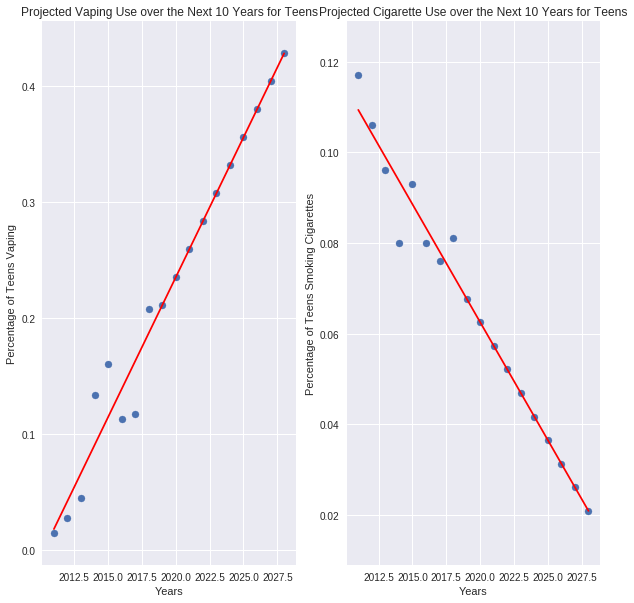

In [0]:
# actual plotting
line = m.T * total_x + b
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 10))
ax1.scatter(total_x, total_y[0])
ax1.plot(total_x,  line[:, 0], 'r')
ax1.set_title("Projected Vaping Use over the Next 10 Years for Teens")
ax1.set_xlabel("Years")
ax1.set_ylabel("Percentage of Teens Vaping")

ax2.scatter(total_x, total_y[1])
ax2.plot(total_x, line[:, 1], 'r')
ax2.set_title("Projected Cigarette Use over the Next 10 Years for Teens")
ax2.set_xlabel("Years")
ax2.set_ylabel("Percentage of Teens Smoking Cigarettes")

In [0]:
projected_y = total_y[:, -10:]
projected_years = total_x[-10:]
# mean differences from vape - cig
mean_difference = np.mean((total_y[0] - total_y[1]))
print(mean_difference)

0.1579821428571418


In [0]:
projected_y.shape

(2, 10)

# Part II
Create a model that simulates the likelihood that a given individual will use a given substance. Take into account social influence and characteristic traits (e.g., social circles, genetics, health issues, income level, and/or any other relevant factors) as well as characteristics of tdrug itself. 
* Demonstrate how your model works by predicting how many students among a class of 300 high school seniors with varying characteristics will use the following substances: nicotine, marijuana, alcohol, and unprescribed opioids


In [0]:
from google.colab import files
files.upload()

Saving marijuana_hs.csv to marijuana_hs.csv


{'marijuana_hs.csv': b'Total (percentage in 1 year),34.9,35.6,37.1\r\nMale,36.3,36.9,37.4\r\nFemale,34,34,36\r\nNone or under 4 years,38.7,37.8,39.6\r\nComplete 4 years,33.7,34.5,36.1\r\nNortheast,41,39,41.5\r\nMidwest,32.7,33.4,38.8\r\nSouth,31.2,32.8,32.7\r\nWest,38.9,40.1,39.6\r\n1.0-2.0 (Low),35.3,35,34.6\r\n2.5-3.0,37.8,36.7,39.7\r\n3.5-4.0,36.8,37.1,39\r\n4.5-5.0,32.5,34.8,35.6\r\n5.5-6.0 (High),32.1,32.6,34.1\r\nWhite,35.1,35.3,36.5\r\nAfrican-American,32.8,32.4,35.5\r\nHispanic,35.6,36.9,36.8'}

## Marijuana

In [0]:
from google.colab import files
files.upload()

In [0]:
import pandas as pd
df = pd.read_csv('marijuana_hs.csv')
print(df.keys())
df.set_index('Total (percentage in 1 year)',inplace=True)
df = df.transpose()
df

Index(['Total (percentage in 1 year)', '34.9', '35.6', '37.1'], dtype='object')


Total (percentage in 1 year),Male,Female,None or under 4 years,Complete 4 years,Northeast,Midwest,South,West,1.0-2.0 (Low),2.5-3.0,3.5-4.0,4.5-5.0,5.5-6.0 (High),White,African-American,Hispanic
34.9,36.3,34.0,38.7,33.7,41.0,32.7,31.2,38.9,35.3,37.8,36.8,32.5,32.1,35.1,32.8,35.6
35.6,36.9,34.0,37.8,34.5,39.0,33.4,32.8,40.1,35.0,36.7,37.1,34.8,32.6,35.3,32.4,36.9
37.1,37.4,36.0,39.6,36.1,41.5,38.8,32.7,39.6,34.6,39.7,39.0,35.6,34.1,36.5,35.5,36.8


In [0]:
keys = np.asarray(df.keys())
keys

array(['Male', 'Female', 'None or under 4 years', 'Complete 4 years',
       'Northeast', 'Midwest', 'South', 'West', '1.0-2.0 (Low)',
       '2.5-3.0', '3.5-4.0', '4.5-5.0', '5.5-6.0 (High)', 'White',
       'African-American', 'Hispanic'], dtype=object)

In [0]:
x = df
y = pd.DataFrame.from_dict({'Total (percentage in 1 year)': [34.9, 35.6, 37.1]})
y

,Total (percentage in 1 year)
0,34.9
1,35.6
2,37.1


In [0]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel
#clf = LassoCV(cv=7)
clf = RidgeCV(cv=2)
sfm = SelectFromModel(clf, threshold=0.000025)
print(sfm.fit(x, y))


SelectFromModel(estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=2, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False),
        max_features=None, norm_order=1, prefit=False, threshold=2.5e-05)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha = 0.5, normalize = True)
ridgereg.fit(x, y)
r_squared = ridgereg.score(x,y)
print(r_squared)

0.9982732612058407


In [0]:
coef = ridgereg.coef_
intercept = ridgereg.intercept_
print("Coefficients: ", coef, "\nIntercepts: ", intercept)

Coefficients:  [[ 0.16754724  0.07386448  0.06090817  0.07615424  0.02044013  0.02660606
   0.080845    0.07646104 -0.26592794  0.04328226  0.07493836  0.05398927
   0.08833734  0.11829995  0.04754483  0.09906669]] 
Intercepts:  [5.38660694]


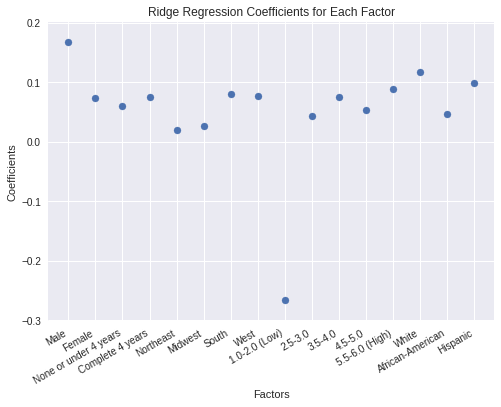

In [0]:
fig, ax = plt.subplots(1,1)

ax.scatter(keys, coef)
ax.set_title("Ridge Regression Coefficients for Each Factor")
ax.set_xlabel("Factors")
ax.set_ylabel("Coefficients")
_ = plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


## Alcohol

In [0]:
from google.colab import files
files.upload()

Saving alcohol_hs.csv to alcohol_hs.csv


{'alcohol_hs.csv': b'Categories,"2,008","2,009",2010,2011,2012,2013,2014,2015,2016,2017\r\nTotal (percentage in 1 year),43.1,43.5,41.2,40,41.5,39.2,37.4,35.3,33.2,33.2\r\nMale,45.8,47.8,44.2,42.1,43.8,41.8,37.4,36,34.5,34.1\r\nFemale,40.9,38.9,37.9,37.5,38.8,36.3,37.1,35,32,32.3\r\nNone or under 4 years,49.7,51,47.9,45.2,44.2,45.3,40.2,37.9,35.6,35.7\r\nComplete 4 years,41.7,41.6,39.3,38.8,40.7,37.9,36.6,35,32.5,32.8\r\nNortheast,49.1,48.4,49.2,46.3,48.1,45.7,41.6,42.7,36.9,37.3\r\nMidwest,42.8,45,40.8,41.2,41.8,39,40.2,33.6,33.7,34\r\nSouth,42.9,42,39.6,37.5,36.6,35.4,34.6,33.1,31.3,31.7\r\nWest,39.2,39.2,37.4,38,43.1,39.8,36.1,35.4,33.8,32.1\r\n1.0-2.0 (Low),41.4,39.8,36.4,36.7,41.4,36.1,32.5,32.5,31.7,28.9\r\n2.5-3.0,42.4,43.4,42.4,38.8,41.4,40.3,38.2,35.3,31.4,31.1\r\n3.5-4.0,43.2,46.9,41.6,41.2,42.7,41.1,37.9,36.5,32.8,33.2\r\n4.5-5.0,43.9,42,42.1,40.1,41.7,39.5,38.7,36.1,35.7,35.8\r\n5.5-6.0 (High),45.9,43.3,38.4,41.9,41.7,38.7,40.6,36.3,34.4,38.3\r\nWhite,48.6,47.2,45.4,43.8,43.

In [0]:
import pandas as pd
df = pd.read_csv('alcohol_hs.csv')
print(df.keys())
df.set_index('Categories',inplace=True)
df = df.transpose()
df

Index(['Categories', '2,008', '2,009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')


Categories,Total (percentage in 1 year),Male,Female,None or under 4 years,Complete 4 years,Northeast,Midwest,South,West,1.0-2.0 (Low),2.5-3.0,3.5-4.0,4.5-5.0,5.5-6.0 (High),White,African-American,Hispanic
"2,008",43.1,45.8,40.9,49.7,41.7,49.1,42.8,42.9,39.2,41.4,42.4,43.2,43.9,45.9,48.6,28.6,38.9
"2,009",43.5,47.8,38.9,51.0,41.6,48.4,45.0,42.0,39.2,39.8,43.4,46.9,42.0,43.3,47.2,30.5,40.1
2010,41.2,44.2,37.9,47.9,39.3,49.2,40.8,39.6,37.4,36.4,42.4,41.6,42.1,38.4,45.4,31.4,40.1
2011,40.0,42.1,37.5,45.2,38.8,46.3,41.2,37.5,38.0,36.7,38.8,41.2,40.1,41.9,43.8,30.1,39.7
2012,41.5,43.8,38.8,44.2,40.7,48.1,41.8,36.6,43.1,41.4,41.4,42.7,41.7,41.7,43.8,29.6,39.8
2013,39.2,41.8,36.3,45.3,37.9,45.7,39.0,35.4,39.8,36.1,40.3,41.1,39.5,38.7,43.6,28.4,39.0
2014,37.4,37.4,37.1,40.2,36.6,41.6,40.2,34.6,36.1,32.5,38.2,37.9,38.7,40.6,42.5,25.9,37.0
2015,35.3,36.0,35.0,37.9,35.0,42.7,33.6,33.1,35.4,32.5,35.3,36.5,36.1,36.3,40.9,24.0,36.3
2016,33.2,34.5,32.0,35.6,32.5,36.9,33.7,31.3,33.8,31.7,31.4,32.8,35.7,34.4,39.0,21.8,34.9
2017,33.2,34.1,32.3,35.7,32.8,37.3,34.0,31.7,32.1,28.9,31.1,33.2,35.8,38.3,39.0,20.3,30.9


In [0]:
y_col = 'Total (percentage in 1 year)'
x = df.drop([y_col], axis = 1)
y = df[y_col]
x.keys(), y.keys()

(Index(['Male', 'Female', 'None or under 4 years', 'Complete 4 years',
        'Northeast', 'Midwest', 'South', 'West', '1.0-2.0 (Low)', '2.5-3.0',
        '3.5-4.0', '4.5-5.0', '5.5-6.0 (High)', 'White', 'African-American',
        'Hispanic'],
       dtype='object', name='Categories'),
 Index(['2,008', '2,009', '2010', '2011', '2012', '2013', '2014', '2015',
        '2016', '2017'],
       dtype='object'))

In [0]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha = 0.5, normalize = True)
ridgereg.fit(x, y)
r_squared = ridgereg.score(x,y)
print(r_squared)

coef = ridgereg.coef_
intercept = ridgereg.intercept_
print("Coefficients: ", coef, "\nIntercepts: ", intercept)

0.9973393283259705
Coefficients:  [0.06030618 0.07330651 0.04833813 0.07801303 0.05125523 0.06791522
 0.06716736 0.05709592 0.05507608 0.05539431 0.0624733  0.08875642
 0.06249257 0.07655752 0.05957274 0.05812711] 
Intercepts:  -0.659219101197003


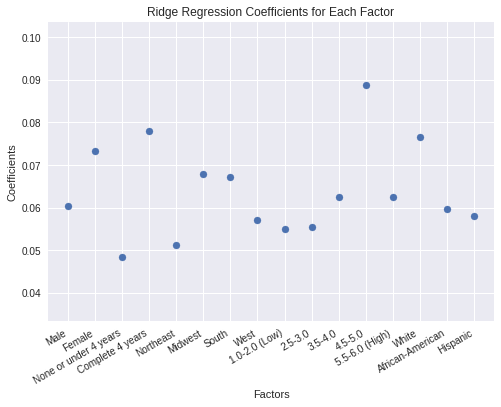

In [0]:
fig, ax = plt.subplots(1,1)

ax.scatter(keys, coef)
ax.set_title("Ridge Regression Coefficients for Each Factor")
ax.set_xlabel("Factors")
ax.set_ylabel("Coefficients")
_ = plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

## Nicotine

In [0]:
from google.colab import files
files.upload()

In [0]:
import pandas as pd
df = pd.read_csv('nicotine_hs.csv')
print(df.keys())
df.set_index('Categories',inplace=True)
df = df.transpose()
df

Index(['Categories', '2,008', '2,009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')


Categories,Total (percentage in 1 year),Male,Female,None or under 4 years,Complete 4 years,Northeast,Midwest,South,West,1.0-2.0 (Low),2.5-3.0,3.5-4.0,4.5-5.0,5.5-6.0 (High),White,African-American,Hispanic
"2,008",20.4,21.5,19.1,32.4,17.6,19.7,22.1,22.4,15.8,18.5,22.4,21.3,18.6,19.2,24.7,10.3,15.0
"2,009",20.1,22.1,17.6,31.2,17.3,18.9,25.7,20.0,14.7,19.9,23.2,21.0,18.0,15.3,23.9,9.8,15.7
2010,19.2,21.9,15.7,31.2,16.3,18.2,21.5,20.5,15.3,17.0,21.6,20.9,17.5,12.8,22.9,10.1,15.0
2011,18.7,21.5,15.1,32.2,15.6,17.8,21.8,18.4,16.4,18.2,22.4,19.6,15.9,14.3,22.2,9.7,14.3
2012,17.1,19.3,14.5,27.9,14.7,18.8,21.0,15.6,13.9,17.0,19.0,20.1,15.7,11.2,21.2,8.6,13.2
2013,16.3,18.4,13.2,28.9,13.0,17.0,16.5,18.6,12.1,18.2,18.2,18.5,14.1,9.5,19.4,9.6,12.4
2014,13.6,15.2,11.6,25.3,10.8,11.7,13.8,15.3,11.9,14.8,16.1,14.2,12.0,9.4,17.5,9.0,11.4
2015,11.4,13.0,9.1,21.9,8.9,10.8,12.7,12.5,8.6,12.9,13.9,12.2,9.7,7.5,15.0,6.9,9.6
2016,10.5,12.7,8.1,19.2,8.4,10.9,12.0,10.8,8.3,9.9,12.0,11.9,9.1,7.6,13.2,6.0,8.2
2017,9.7,10.6,8.3,16.5,8.0,9.6,9.6,11.2,7.1,7.9,11.3,10.4,8.7,8.1,12.7,5.0,6.9


In [0]:
y_col = 'Total (percentage in 1 year)'
x = df.drop([y_col], axis = 1)
y = df[y_col]
x.keys(), y.keys()

(Index(['Male', 'Female', 'None or under 4 years', 'Complete 4 years',
        'Northeast', 'Midwest', 'South', 'West', '1.0-2.0 (Low)', '2.5-3.0',
        '3.5-4.0', '4.5-5.0', '5.5-6.0 (High)', 'White', 'African-American',
        'Hispanic'],
       dtype='object', name='Categories'),
 Index(['2,008', '2,009', '2010', '2011', '2012', '2013', '2014', '2015',
        '2016', '2017'],
       dtype='object'))

In [0]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha = 0.5, normalize = True)
ridgereg.fit(x, y)
r_squared = ridgereg.score(x,y)
print(r_squared)

coef = ridgereg.coef_
intercept = ridgereg.intercept_
print("Coefficients: ", coef, "\nIntercepts: ", intercept)


0.9974883621976892
Coefficients:  [0.06334573 0.06830361 0.03977868 0.0761912  0.06815649 0.05117599
 0.06609917 0.06837092 0.04877067 0.05988052 0.06296187 0.07386901
 0.06497514 0.05846397 0.10037229 0.08051318] 
Intercepts:  0.09620309580342656


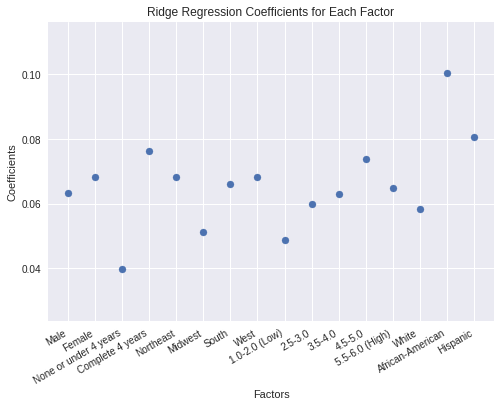

In [0]:
fig, ax = plt.subplots(1,1)

ax.scatter(keys, coef)
ax.set_title("Ridge Regression Coefficients for Each Factor")
ax.set_xlabel("Factors")
ax.set_ylabel("Coefficients")
_ = plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

## Opioids

In [0]:
from google.colab import files
files.upload()

Saving opioids_hs.csv to opioids_hs.csv


{'opioids_hs.csv': b'Categories,"2,008","2,009",2010,2011,2012,2013,2014,2015,2016,2017\r\nTotal (percentage in 1 year),0.7,0.7,0.9,0.8,0.6,0.6,0.6,0.5,0.3,0.4\r\nMale,1,1,1.1,1,0.8,0.8,0.9,0.7,0.4,0.4\r\nFemale,0.4,0.5,0.5,0.4,0.4,0.3,0.2,0.2,0.2,0.3\r\nNone or under 4 years,1.4,1.1,1.7,1.2,1.2,1,1.1,1.3,0.8,0.7\r\nComplete 4 years,0.5,0.6,0.6,0.7,0.5,0.4,0.5,0.3,0.1,0.2\r\nNortheast,0.7,0.8,1.3,0.7,0.8,0.6,0.8,0.3,0.2,0.1\r\nMidwest,0.6,0.8,0.9,0.7,0.7,0.6,0.6,0.6,0.4,0.2\r\nSouth,0.7,0.6,0.7,0.7,0.4,0.5,0.5,0.4,0.2,0.6\r\nWest,1,0.9,0.7,1,0.8,0.7,0.5,0.6,0.4,0.4\r\n1.0-2.0 (Low),1.3,1.5,1.1,1,1.3,1,1.3,0.8,0.5,0.7\r\n2.5-3.0,0.5,0.8,1,0.5,0.8,0.6,0.6,0.4,0.2,0.6\r\n3.5-4.0,0.9,0.6,0.9,0.8,0.4,0.4,0.3,0.6,0.3,0.3\r\n4.5-5.0,0.5,0.6,0.7,0.8,0.5,0.5,0.7,0.4,0.2,0.2\r\n5.5-6.0 (High),0.7,0.5,0.6,0.7,0.4,0.6,0.5,0.2,0.3,0.2\r\nWhite,0.9,0.7,0.8,0.9,0.7,0.5,0.4,0.4,0.3,0.2\r\nAfrican-American,0.4,0.4,0.6,0.7,0.8,0.8,0.9,1,0.6,0.5\r\nHispanic,0.9,0.7,0.6,0.5,0.4,0.5,0.6,0.5,0.4,0.4'}

In [0]:
import pandas as pd
df = pd.read_csv('opioids_hs.csv')
print(df.keys())
df.set_index('Categories',inplace=True)
df = df.transpose()
df

Index(['Categories', '2,008', '2,009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')


Categories,Total (percentage in 1 year),Male,Female,None or under 4 years,Complete 4 years,Northeast,Midwest,South,West,1.0-2.0 (Low),2.5-3.0,3.5-4.0,4.5-5.0,5.5-6.0 (High),White,African-American,Hispanic
"2,008",0.7,1.0,0.4,1.4,0.5,0.7,0.6,0.7,1.0,1.3,0.5,0.9,0.5,0.7,0.9,0.4,0.9
"2,009",0.7,1.0,0.5,1.1,0.6,0.8,0.8,0.6,0.9,1.5,0.8,0.6,0.6,0.5,0.7,0.4,0.7
2010,0.9,1.1,0.5,1.7,0.6,1.3,0.9,0.7,0.7,1.1,1.0,0.9,0.7,0.6,0.8,0.6,0.6
2011,0.8,1.0,0.4,1.2,0.7,0.7,0.7,0.7,1.0,1.0,0.5,0.8,0.8,0.7,0.9,0.7,0.5
2012,0.6,0.8,0.4,1.2,0.5,0.8,0.7,0.4,0.8,1.3,0.8,0.4,0.5,0.4,0.7,0.8,0.4
2013,0.6,0.8,0.3,1.0,0.4,0.6,0.6,0.5,0.7,1.0,0.6,0.4,0.5,0.6,0.5,0.8,0.5
2014,0.6,0.9,0.2,1.1,0.5,0.8,0.6,0.5,0.5,1.3,0.6,0.3,0.7,0.5,0.4,0.9,0.6
2015,0.5,0.7,0.2,1.3,0.3,0.3,0.6,0.4,0.6,0.8,0.4,0.6,0.4,0.2,0.4,1.0,0.5
2016,0.3,0.4,0.2,0.8,0.1,0.2,0.4,0.2,0.4,0.5,0.2,0.3,0.2,0.3,0.3,0.6,0.4
2017,0.4,0.4,0.3,0.7,0.2,0.1,0.2,0.6,0.4,0.7,0.6,0.3,0.2,0.2,0.2,0.5,0.4


In [0]:
y_col = 'Total (percentage in 1 year)'
x = df.drop([y_col], axis = 1)
y = df[y_col]
x.keys(), y.keys()

(Index(['Male', 'Female', 'None or under 4 years', 'Complete 4 years',
        'Northeast', 'Midwest', 'South', 'West', '1.0-2.0 (Low)', '2.5-3.0',
        '3.5-4.0', '4.5-5.0', '5.5-6.0 (High)', 'White', 'African-American',
        'Hispanic'],
       dtype='object', name='Categories'),
 Index(['2,008', '2,009', '2010', '2011', '2012', '2013', '2014', '2015',
        '2016', '2017'],
       dtype='object'))

In [0]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha = 0.5, normalize = True)
ridgereg.fit(x, y)
r_squared = ridgereg.score(x,y)
print(r_squared)

coef = ridgereg.coef_
intercept = ridgereg.intercept_
print("Coefficients: ", coef, "\nIntercepts: ", intercept)

0.98617574506422
Coefficients:  [ 0.0669089   0.10602662  0.05514079  0.09403898  0.04844428  0.06916695
  0.15390165  0.01923418 -0.00985117  0.07430866  0.07267117  0.10762047
  0.08289851  0.03919941  0.02184197 -0.01437314] 
Intercepts:  0.04969825998474464


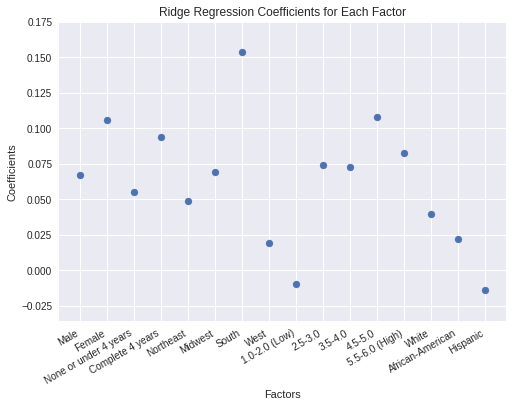

In [0]:
fig, ax = plt.subplots(1,1)

ax.scatter(keys, coef)
ax.set_title("Ridge Regression Coefficients for Each Factor")
ax.set_xlabel("Factors")
ax.set_ylabel("Coefficients")
_ = plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')